In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df_train.shape

(188533, 13)

In [4]:
# getting descriptive stats
df_train.describe(include='all')
# use include = all for getting categorical column also.

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [5]:
# Count of missing values and percentage
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100

# Combine into a table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

              Missing Values  Missing Percentage (%)
id                         0                0.000000
brand                      0                0.000000
model                      0                0.000000
model_year                 0                0.000000
milage                     0                0.000000
fuel_type               5083                2.696080
engine                     0                0.000000
transmission               0                0.000000
ext_col                    0                0.000000
int_col                    0                0.000000
accident                2452                1.300568
clean_title            21419               11.360876
price                      0                0.000000


In [6]:
# Unique values in each column
unique_values = df_train.nunique().sort_values(ascending=False)

print(unique_values)

id              188533
milage            6651
model             1897
price             1569
engine            1117
ext_col            319
int_col            156
brand               57
transmission        52
model_year          34
fuel_type            7
accident             2
clean_title          1
dtype: int64


In [7]:
# Check unique values only for object (categorical) columns
for col in df_train.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df_train[col].unique()[:10])  # Show only first 10 unique values to avoid overflow


Column: brand
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac']

Column: model
['Cooper S Base' 'LS V8' 'Silverado 2500 LT' 'G90 5.0 Ultimate'
 'Metris Base' 'A6 2.0T Sport' 'A8 L 3.0T' 'Silverado 1500 1LZ'
 'F-150 XLT' 'M4 Base']

Column: fuel_type
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Column: engine
['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability'
 '420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel'
 '208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel'
 '333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel'
 '355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability'
 '2.7L V6 24V PDI DOHC Twin Turbo'
 '425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel']

Column: transmission
['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Auto

# Drop columns

In [8]:
df_train.drop('id', axis=1, inplace=True)             # not important 
df_train.drop('clean_title', axis=1, inplace=True)    # not important as only one unique variable
df_train.drop('ext_col', axis=1, inplace=True)        
df_train.drop('int_col', axis=1, inplace=True)        

In [9]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,97500


In [10]:
df_train.shape

(188533, 9)

# Handling Outliers using price and milage column

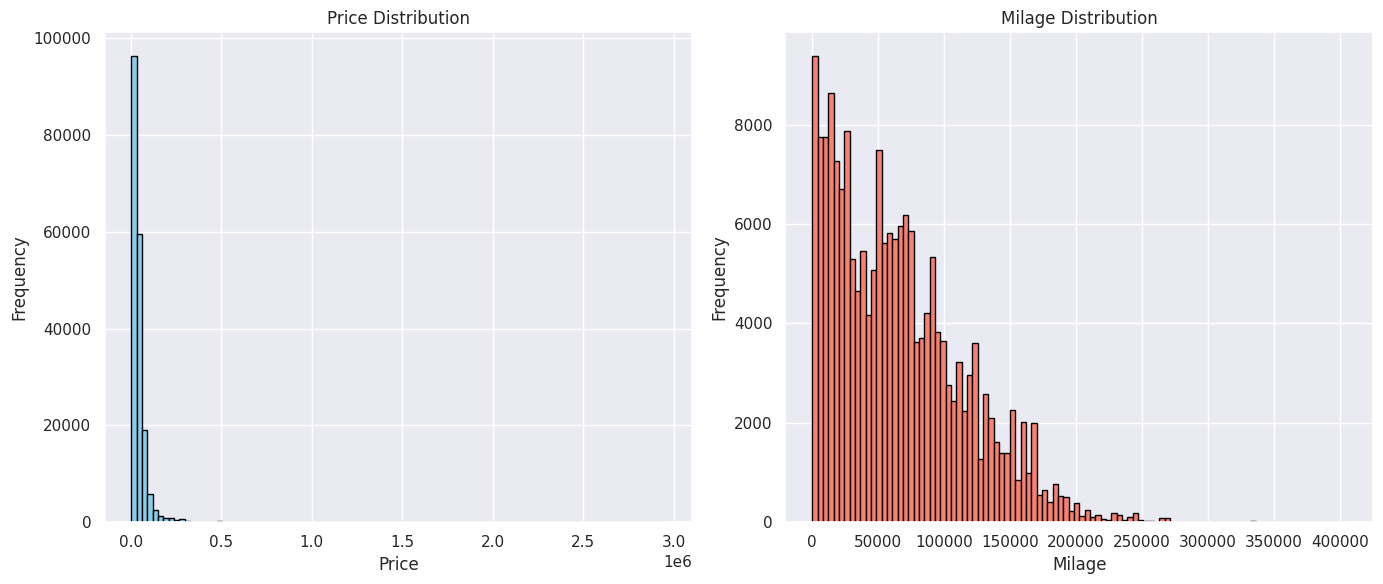

In [11]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot Price distribution
plt.subplot(1, 2, 1)
plt.hist(df_train['price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot Milage distribution
plt.subplot(1, 2, 2)
plt.hist(df_train['milage'], bins=100, color='salmon', edgecolor='black')
plt.title('Milage Distribution')
plt.xlabel('Milage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Find the maximum price
max_price = df_train['price'].max()
print(f"Maximum price: ${max_price}")

Maximum price: $2954083


In [13]:
# Count of cars above different price thresholds
over_100k = (df_train['price'] > 100000).sum()
over_500k = (df_train['price'] > 500000).sum()
over_1m = (df_train['price'] > 1000000).sum()

print(f"Cars priced over $100,000: {over_100k}")
print(f"Cars priced over $500,000: {over_500k}")
print(f"Cars priced over $1,000,000: {over_1m}")

Cars priced over $100,000: 10437
Cars priced over $500,000: 352
Cars priced over $1,000,000: 148


In [14]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# First, store original number of rows
original_rows = df_train.shape[0]

# Apply IQR removal on milage and price
df_train = remove_outliers_iqr(df_train,'milage')
df_train = remove_outliers_iqr(df_train,'price')

In [15]:
# Calculate how many rows were removed
new_rows = df_train.shape[0]
rows_removed = original_rows - new_rows

print(f"Original rows: {original_rows}")
print(f"Rows after removing outliers: {new_rows}")
print(f"Total rows removed: {rows_removed}")

Original rows: 188533
Rows after removing outliers: 175900
Total rows removed: 12633


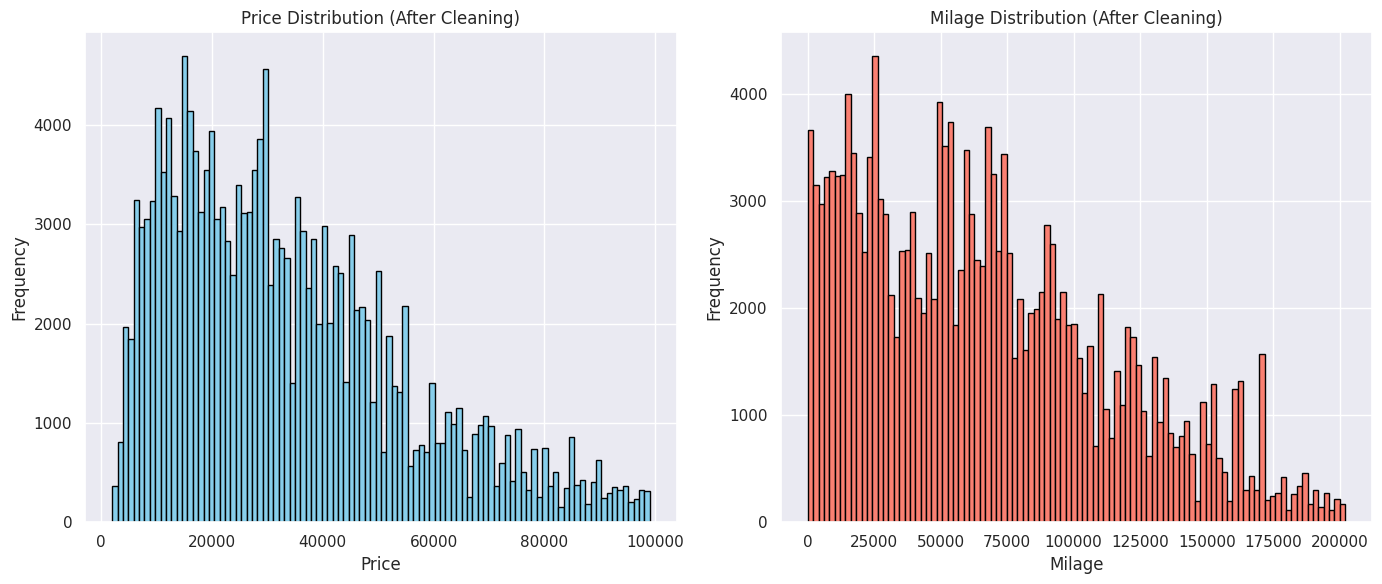

In [16]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 6))

# Price distribution
plt.subplot(1, 2, 1)
plt.hist(df_train['price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Price Distribution (After Cleaning)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Milage distribution
plt.subplot(1, 2, 2)
plt.hist(df_train['milage'], bins=100, color='salmon', edgecolor='black')
plt.title('Milage Distribution (After Cleaning)')
plt.xlabel('Milage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,29950


# Dealing with model year

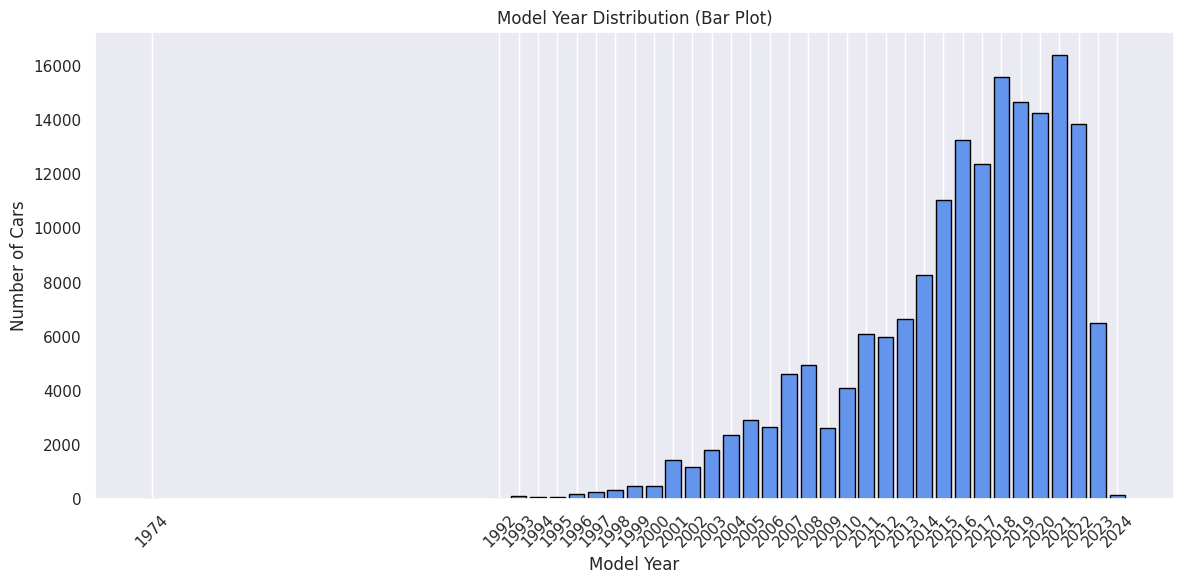

In [18]:
import matplotlib.pyplot as plt

# Create a count of cars per model year
model_year_counts = df_train['model_year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_year_counts.index, model_year_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Model Year Distribution (Bar Plot)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(model_year_counts.index, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
# Filter out cars before model year 2005
df_train = df_train[df_train['model_year'] >= 2005].copy()

# Check shape after filtering
print(f"Remaining rows after dropping old cars: {df_train.shape[0]}")

Remaining rows after dropping old cars: 167014


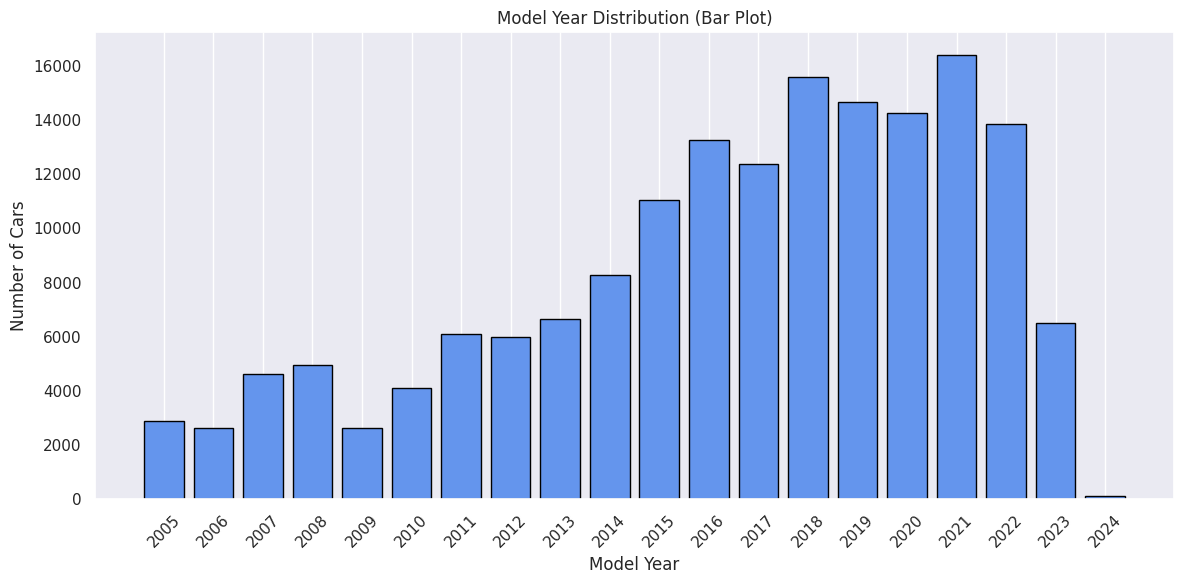

In [20]:
import matplotlib.pyplot as plt

# Create a count of cars per model year
model_year_counts = df_train['model_year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_year_counts.index, model_year_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Model Year Distribution (Bar Plot)')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.xticks(model_year_counts.index, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pre-processing

In [21]:
# Count of missing values and percentage
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100

# Combine into a table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)

              Missing Values  Missing Percentage (%)
brand                      0                0.000000
model                      0                0.000000
model_year                 0                0.000000
milage                     0                0.000000
fuel_type               4669                2.795574
engine                     0                0.000000
transmission               0                0.000000
accident                2127                1.273546
price                      0                0.000000


In [22]:
df_train['accident'] = df_train['accident'].fillna('None reported')

In [23]:
# Step 1: Extract fuel type from engine
def extract_fuel_from_engine(engine):
    engine = str(engine)
    if 'Electric' in engine:
        return 'Electric'
    elif 'Flex Fuel' in engine:
        return 'Flex Fuel'
    elif 'Gasoline' in engine:
        return 'Gasoline'
    elif 'Diesel' in engine:
        return 'Diesel'
    else:
        return np.nan  # If engine doesn't help

# Create a helper column from engine
df_train['fuel_from_engine'] = df_train['engine'].apply(extract_fuel_from_engine)

# Step 2: Fill missing values in fuel_type
df_train['fuel_type'] = df_train['fuel_type'].fillna(df_train['fuel_from_engine'])

# Step 3: Final fallback if still missing
df_train['fuel_type'] = df_train['fuel_type'].fillna('Unknown')

# Step 4: Drop the helper column if you want
df_train.drop(columns=['fuel_from_engine'],inplace=True)


In [24]:
# Check how many missing values are left in 'fuel_type'
missing_fuel_type = df_train['fuel_type'].isnull().sum()

print(f"Missing values in fuel_type after filling: {missing_fuel_type}")

Missing values in fuel_type after filling: 0


In [25]:
# Value counts for fuel_type after filling
fuel_type_counts = df_train['fuel_type'].value_counts()

print(fuel_type_counts)

Gasoline          146615
Hybrid              6265
E85 Flex Fuel       5156
Electric            4463
Diesel              3436
Plug-In Hybrid       510
–                    391
Unknown              164
not supported         13
Flex Fuel              1
Name: fuel_type, dtype: int64


In [26]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,97500
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,29950
6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,None reported,28500
7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,12500


In [27]:
import re

# Function to extract engine details
def extract_engine_info(text):
    hp = re.search(r'([\d.]+)HP', text)
    size = re.search(r'([\d.]+)L', text)
    cyl = re.search(r'(\d+)\sCylinder', text)

    return pd.Series({
        'engine_hp': float(hp.group(1)) if hp else None,
        'engine_size_L': float(size.group(1)) if size else None,
        'engine_cylinders': int(cyl.group(1)) if cyl else None,
    })

# Apply the function to create new columns
df_train[['engine_hp', 'engine_size_L', 'engine_cylinders']] = df_train['engine'].apply(extract_engine_info)

# Display the first few rows to verify
df_train[['engine', 'engine_hp', 'engine_size_L', 'engine_cylinders']].head()


,engine,engine_hp,engine_size_L,engine_cylinders
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,420.0,5.0,8.0
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,208.0,2.0,4.0
5,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,252.0,2.0,4.0
6,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,333.0,3.0,6.0
7,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,355.0,5.3,8.0


In [28]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price,engine_hp,engine_size_L,engine_cylinders
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,45000,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,97500,208.0,2.0,4.0
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,29950,252.0,2.0,4.0
6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,None reported,28500,333.0,3.0,6.0
7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,12500,355.0,5.3,8.0


In [29]:
# Check missing values in the new engine columns
missing_engine_cols = df_train[['engine_size_L', 'engine_cylinders', 'engine_hp']].isnull().sum()

print(missing_engine_cols)

engine_size_L       12599
engine_cylinders    33378
engine_hp           29161
dtype: int64


In [30]:
# Define the group to use for filling
group_cols = ['brand', 'model', 'model_year']

# Fill engine_size_L with group-wise median
df_train['engine_size_L'] = df_train.groupby(group_cols)['engine_size_L'].transform(lambda x: x.fillna(x.median()))

# Fill engine_cylinders with group-wise mode
def fill_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0]) if not mode_val.empty else series

df_train['engine_cylinders'] = df_train.groupby(group_cols)['engine_cylinders'].transform(fill_mode)

# Fill engine_hp with group-wise median
df_train['engine_hp'] = df_train.groupby(group_cols)['engine_hp'].transform(lambda x: x.fillna(x.median()))

# Step 2: Fill any leftover missing values with overall median/mode
df_train['engine_size_L'] = df_train['engine_size_L'].fillna(df_train['engine_size_L'].median())
df_train['engine_cylinders'] = df_train['engine_cylinders'].fillna(df_train['engine_cylinders'].median())
df_train['engine_hp'] = df_train['engine_hp'].fillna(df_train['engine_hp'].median())


In [31]:
# Check missing values again in engine-related columns
missing_after_fill = df_train[['engine_size_L', 'engine_cylinders', 'engine_hp']].isnull().sum()

print(missing_after_fill)

engine_size_L       0
engine_cylinders    0
engine_hp           0
dtype: int64


In [32]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,price,engine_hp,engine_size_L,engine_cylinders
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,45000,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,97500,208.0,2.0,4.0
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,29950,252.0,2.0,4.0
6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,None reported,28500,333.0,3.0,6.0
7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,12500,355.0,5.3,8.0


In [33]:
df_train.drop('engine', axis=1, inplace=True)

In [34]:
df_train.head()

,brand,model,model_year,milage,fuel_type,transmission,accident,price,engine_hp,engine_size_L,engine_cylinders
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,None reported,45000,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,None reported,97500,208.0,2.0,4.0
5,Audi,A6 2.0T Sport,2018,40950,Gasoline,A/T,None reported,29950,252.0,2.0,4.0
6,Audi,A8 L 3.0T,2016,62200,Gasoline,8-Speed A/T,None reported,28500,333.0,3.0,6.0
7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,A/T,None reported,12500,355.0,5.3,8.0


In [35]:
from datetime import datetime

# Get the current year dynamically
current_year = datetime.now().year

# Create car_age feature
df_train['car_age'] = current_year - df_train['model_year']

# Create hp_per_litre feature
# Be careful to avoid division by zero
df_train['hp_per_litre'] = df_train['engine_hp'] / df_train['engine_size_L']
df_train['hp_per_litre'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle division errors
df_train['hp_per_litre'] = df_train['hp_per_litre'].fillna(df_train['hp_per_litre'].median())  # Fill any missing

# Quick check
df_train[['car_age', 'hp_per_litre']].head()

,car_age,hp_per_litre
3,8,84.000000
4,4,104.000000
5,7,126.000000
6,9,111.000000
7,9,66.981132


In [36]:
df_train.drop(columns=['model_year'],inplace=True)

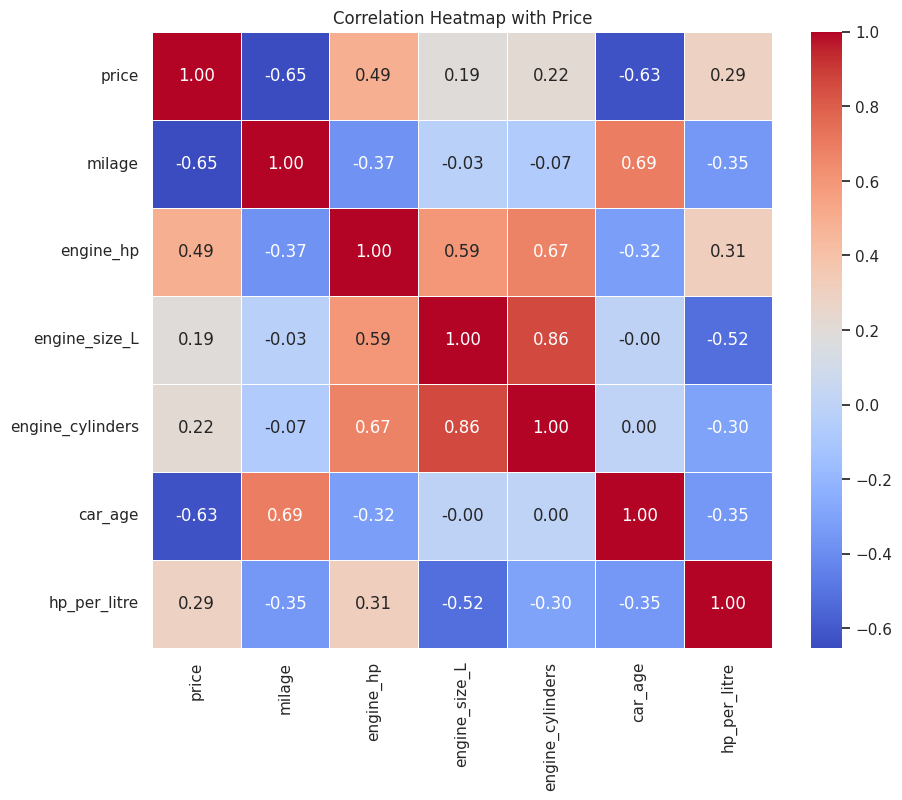

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = ['price', 'milage', 'engine_hp', 'engine_size_L', 'engine_cylinders', 'car_age', 'hp_per_litre']

# Compute correlation matrix
corr_matrix = df_train[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Price')
plt.show()

# Handling categorical columns

In [38]:
# Target encoding: replace 'model' with average price per model
model_target_mean = df_train.groupby('model')['price'].mean()

# Map to a new column
df_train['model_encoded'] = df_train['model'].map(model_target_mean)

# Drop original model column (optional)
df_train.drop(columns=['model'], inplace=True)

# Check the result
df_train[['model_encoded']].head()


,model_encoded
3,41225.919540
4,45101.243070
5,28007.062500
6,24018.333333
7,24076.636364


In [39]:
df_train.head()

,brand,milage,fuel_type,transmission,accident,price,engine_hp,engine_size_L,engine_cylinders,car_age,hp_per_litre,model_encoded
3,Genesis,19500,Gasoline,Transmission w/Dual Shift Mode,None reported,45000,420.0,5.0,8.0,8,84.000000,41225.919540
4,Mercedes-Benz,7388,Gasoline,7-Speed A/T,None reported,97500,208.0,2.0,4.0,4,104.000000,45101.243070
5,Audi,40950,Gasoline,A/T,None reported,29950,252.0,2.0,4.0,7,126.000000,28007.062500
6,Audi,62200,Gasoline,8-Speed A/T,None reported,28500,333.0,3.0,6.0,9,111.000000,24018.333333
7,Chevrolet,102604,E85 Flex Fuel,A/T,None reported,12500,355.0,5.3,8.0,9,66.981132,24076.636364


In [40]:
# Columns to one-hot encode
one_hot_cols = ['brand', 'fuel_type', 'transmission', 'accident']

# Apply one-hot encoding
df_train = pd.get_dummies(df_train, columns=one_hot_cols, drop_first=True)

# Quick check
print(df_train.shape)
df_train.head()

(167014, 125)


,milage,price,engine_hp,engine_size_L,engine_cylinders,car_age,hp_per_litre,model_encoded,brand_Alfa,brand_Aston,...,transmission_M/T,transmission_Manual,transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable,transmission_–,accident_None reported,accident_None reported
3,19500,45000,420.0,5.0,8.0,8,84.000000,41225.919540,0,0,...,0,0,0,0,0,1,0,0,1,0
4,7388,97500,208.0,2.0,4.0,4,104.000000,45101.243070,0,0,...,0,0,0,0,0,0,0,0,1,0
5,40950,29950,252.0,2.0,4.0,7,126.000000,28007.062500,0,0,...,0,0,0,0,0,0,0,0,1,0
6,62200,28500,333.0,3.0,6.0,9,111.000000,24018.333333,0,0,...,0,0,0,0,0,0,0,0,1,0
7,102604,12500,355.0,5.3,8.0,9,66.981132,24076.636364,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
import numpy as np

# Step 1: Replace inf and -inf with NaN
df_train.replace([np.inf, -np.inf], np.nan,inplace=True)

# Step 2: Fill any remaining NaNs (after replacing infs)
df_train.fillna(0,inplace=True)

Scaling the columns

In [42]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['milage', 'engine_hp', 'engine_size_L', 'engine_cylinders', 'car_age', 'hp_per_litre', 'model_encoded']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])

# Quick check
df_train[scale_cols].head()

,milage,engine_hp,engine_size_L,engine_cylinders,car_age,hp_per_litre,model_encoded
3,-0.985416,0.700606,0.935894,1.145901,-0.123254,-0.451274,0.486745
4,-1.251761,-1.253131,-1.291854,-1.512185,-0.987345,0.212400,0.774069
5,-0.513728,-0.847638,-1.291854,-1.512185,-0.339277,0.942440,-0.493324
6,-0.046438,-0.101164,-0.549271,-0.183142,0.092768,0.444685,-0.789055
7,0.842051,0.101583,1.158669,1.145901,0.092768,-1.016022,-0.784733


Log transform the target column price

In [43]:
import numpy as np

# Log-transform the target
df_train['price_log'] = np.log1p(df_train['price'])

# Quick check
df_train[['price', 'price_log']].head()

,price,price_log
3,45000,10.714440
4,97500,11.487618
5,29950,10.307318
6,28500,10.257694
7,12500,9.433564


# Preparing splitting the dataset

In [44]:
# Define X first
X = df_train.drop(columns=['price', 'price_log'])

# Check for inf values
print(np.isinf(X).sum().sum(), "infinite values in X")

# Check for NaN values
print(X.isnull().sum().sum(), "NaN values in X")

0 infinite values in X
0 NaN values in X


In [45]:
# Check if y (target) has inf or NaN
y = df_train['price_log']

print(np.isinf(y).sum(), "infinite values in y")
print(np.isnan(y).sum(), "NaN values in y")

0 infinite values in y
0 NaN values in y


In [46]:
# Check max and min value of each feature
print(X.max())
print(X.min())

milage                                         3.028990
engine_hp                                      6.230048
engine_size_L                                  3.460675
engine_cylinders                               3.803988
car_age                                        2.469016
                                                 ...   
transmission_Transmission w/Dual Shift Mode    1.000000
transmission_Variable                          1.000000
transmission_–                                 1.000000
accident_None reported                         1.000000
accident_None reported                         1.000000
Length: 124, dtype: float64
milage                                        -1.412025
engine_hp                                     -2.524903
engine_size_L                                 -2.294340
engine_cylinders                              -2.176707
car_age                                       -1.635412
                                                 ...   
transmission_Transmi

In [47]:
from sklearn.model_selection import train_test_split

# Step 1: Define features (X) and target (y)
X = df_train.drop(columns=['price', 'price_log'])  # Drop original and log-transformed price
y = df_train['price_log']  # Use log-transformed price as target

# Step 2: Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick check
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (133611, 124)
Validation set size: (33403, 124)


# Linear Regression model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Initialize the model
model = LinearRegression()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Predict on validation set
y_val_pred_log = model.predict(X_val)

# Step 4: Inverse log-transform to get back to original price scale
y_val_pred = np.expm1(y_val_pred_log)  # because we used np.log1p
y_val_actual = np.expm1(y_val)  # inverse transform the actual y_val too

# Step 5: Evaluate the model
rmse = mean_squared_error(y_val_actual, y_val_pred, squared=False)
mae = mean_absolute_error(y_val_actual, y_val_pred)
r2 = r2_score(y_val_actual, y_val_pred)

print(f"Validation RMSE: ${rmse:.2f}")
print(f"Validation MAE: ${mae:.2f}")
print(f"Validation R² Score: {r2:.4f}")


Validation RMSE: $13951.82
Validation MAE: $9645.16
Validation R² Score: 0.5666


# XGBoost Regressor Training and Evaluation

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=500,    # Number of trees
    max_depth=6,         # Tree depth
    learning_rate=0.05,  # Learning rate
    subsample=0.8,       # Sample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    random_state=42,
    n_jobs=-1            # Use all CPU cores
)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Predict on validation set
y_val_pred_log_xgb = xgb_model.predict(X_val)

# Step 4: Inverse transform predictions
y_val_pred_xgb = np.expm1(y_val_pred_log_xgb)
y_val_actual = np.expm1(y_val)

# Step 5: Evaluate the model
rmse_xgb = mean_squared_error(y_val_actual, y_val_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_val_actual, y_val_pred_xgb)
r2_xgb = r2_score(y_val_actual, y_val_pred_xgb)

print(f"XGBoost Validation RMSE: ${rmse_xgb:.2f}")
print(f"XGBoost Validation MAE: ${mae_xgb:.2f}")
print(f"XGBoost Validation R² Score: {r2_xgb:.4f}")

XGBoost Validation RMSE: $13348.49
XGBoost Validation MAE: $9211.23
XGBoost Validation R² Score: 0.6033


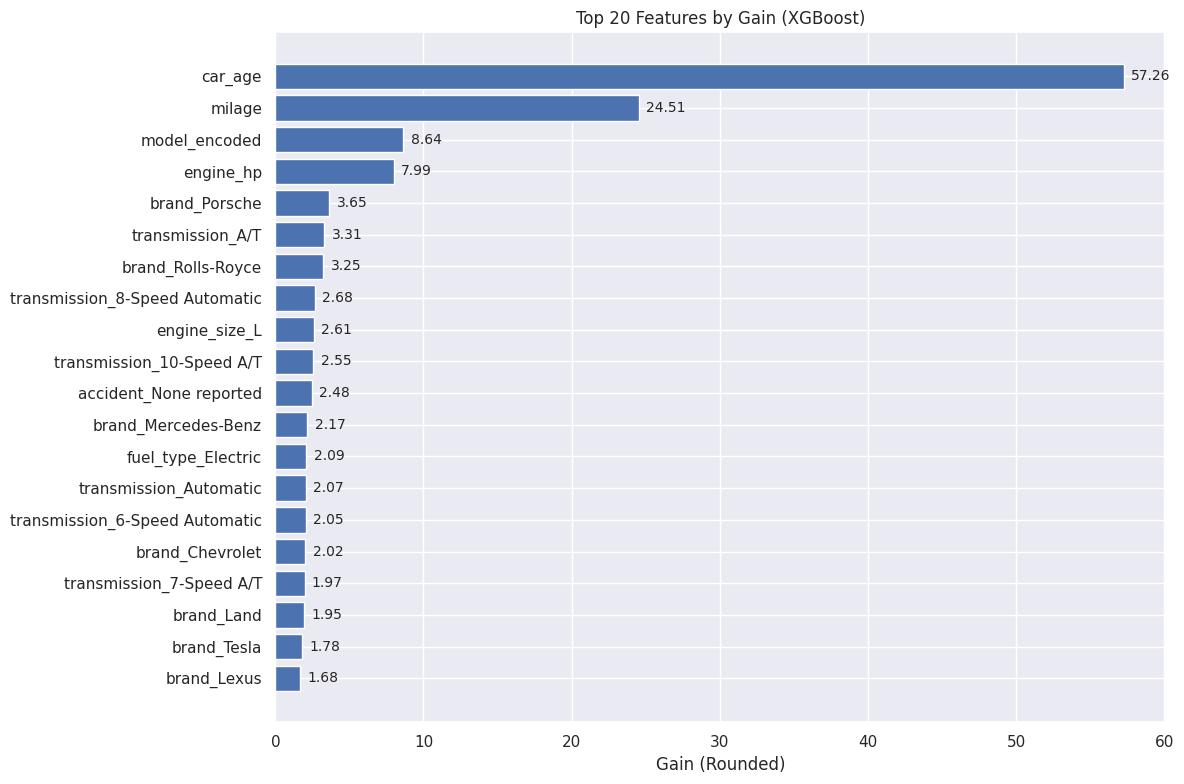

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extract feature importance by "gain"
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

# Step 2: Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
})

# Step 3: Round Gain values to two decimal places
importance_df['Gain'] = importance_df['Gain'].round(2)

# Step 4: Sort by Gain descending
importance_df = importance_df.sort_values(by='Gain', ascending=False)

# Step 5: Plot with numbers on bars
plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Feature'][:20][::-1], importance_df['Gain'][:20][::-1])

# Add Gain numbers on each bar
for bar, gain in zip(bars, importance_df['Gain'][:20][::-1]):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly right of bar
        bar.get_y() + bar.get_height()/2,  # Centered vertically
        f'{gain:.2f}',  # Format to two decimals
        va='center',
        fontsize=10
    )

plt.xlabel('Gain (Rounded)')
plt.title('Top 20 Features by Gain (XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature importance plot shows that car age, mileage, and encoded model information were the most valuable predictors for estimating car prices, based on their frequency of use (F-Score) in the XGBoost model

# LightGBM Regressor

In [52]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Step 2: Train
lgb_model.fit(X_train, y_train)

# Step 3: Predict
y_val_pred_log_lgb = lgb_model.predict(X_val)

# Step 4: Inverse transform predictions
y_val_pred_lgb = np.expm1(y_val_pred_log_lgb)
y_val_actual = np.expm1(y_val)

# Step 5: Evaluate
rmse_lgb = mean_squared_error(y_val_actual, y_val_pred_lgb, squared=False)
mae_lgb = mean_absolute_error(y_val_actual, y_val_pred_lgb)
r2_lgb = r2_score(y_val_actual, y_val_pred_lgb)

print(f"LightGBM Validation RMSE: ${rmse_lgb:.2f}")
print(f"LightGBM Validation MAE: ${mae_lgb:.2f}")
print(f"LightGBM Validation R² Score: {r2_lgb:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 133611, number of used features: 101
[LightGBM] [Info] Start training from score 10.242050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

# Catboost Regressor

In [53]:
from catboost import CatBoostRegressor

# Step 1: Initialize CatBoost Regressor
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100  # Prints progress every 100 trees
)

# Step 2: Train
cat_model.fit(X_train, y_train)

# Step 3: Predict
y_val_pred_log_cat = cat_model.predict(X_val)

# Step 4: Inverse transform predictions
y_val_pred_cat = np.expm1(y_val_pred_log_cat)
y_val_actual = np.expm1(y_val)

# Step 5: Evaluate
rmse_cat = mean_squared_error(y_val_actual, y_val_pred_cat, squared=False)
mae_cat = mean_absolute_error(y_val_actual, y_val_pred_cat)
r2_cat = r2_score(y_val_actual, y_val_pred_cat)

print(f"CatBoost Validation RMSE: ${rmse_cat:.2f}")
print(f"CatBoost Validation MAE: ${mae_cat:.2f}")
print(f"CatBoost Validation R² Score: {r2_cat:.4f}")


0:	learn: 0.6736113	total: 143ms	remaining: 1m 11s
100:	learn: 0.3941923	total: 1.46s	remaining: 5.75s
200:	learn: 0.3898853	total: 2.58s	remaining: 3.84s
300:	learn: 0.3870783	total: 3.7s	remaining: 2.45s
400:	learn: 0.3848133	total: 4.75s	remaining: 1.17s
499:	learn: 0.3831124	total: 5.72s	remaining: 0us
CatBoost Validation RMSE: $13430.56
CatBoost Validation MAE: $9283.59
CatBoost Validation R² Score: 0.5984


# Randomized Search CV for XGBoost

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [300, 500, 700, 900],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# Initialize XGBoost model
xgb_model_base = xgb.XGBRegressor(
    random_state=42,
    n_jobs=-1
)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model_base,
    param_distributions=param_dist,
    n_iter=30,                # Try 30 different combinations
    scoring='neg_root_mean_squared_error',  # RMSE scoring
    cv=3,                     # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters (Randomized Search):", random_search.best_params_)
print("Best RMSE (Randomized Search):", -random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters (Randomized Search): {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.8}
Best RMSE (Randomized Search): 0.3865762117876053
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=9, n_estimators=500, subsample=0.6; total time=  33.7s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=300, subsample=0.6; total time=  24.9s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=4, n_estimators=700, subsample=0.9; total time=  20.7s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500, subsample=0.7; total time=  26.3s
[CV] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=900, subsample=0.7; total time=  31.5s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=4, n_estimators=500, subsample=0.6; total time=  18.0s
[CV] END colsample_bytree=0.9, learning_rate=0.03, ma

In [55]:
# Step 1: Best parameters
best_params = random_search.best_params_

# Step 2: Re-initialize fresh XGBoost model
final_xgb_model = xgb.XGBRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)

# Step 3: Retrain on full training data
final_xgb_model.fit(X_train, y_train)

# Step 4: Predict on validation set
y_val_pred_log_final = final_xgb_model.predict(X_val)

# Step 5: Inverse log transform
y_val_pred_final = np.expm1(y_val_pred_log_final)
y_val_actual = np.expm1(y_val)

# Step 6: Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_final = mean_squared_error(y_val_actual, y_val_pred_final, squared=False)
mae_final = mean_absolute_error(y_val_actual, y_val_pred_final)
r2_final = r2_score(y_val_actual, y_val_pred_final)

print(f"Final Validation RMSE (Dollars): ${rmse_final:.2f}")
print(f"Final Validation MAE (Dollars): ${mae_final:.2f}")
print(f"Final Validation R² Score: {r2_final:.4f}")


Final Validation RMSE (Dollars): $13340.60
Final Validation MAE (Dollars): $9206.43
Final Validation R² Score: 0.6037


In [57]:
import pickle

with open('xgboost_final_model.pkl', 'wb') as f:
    pickle.dump(final_xgb_model,f)

In [59]:
Pipeline 
Start
  ↓
Load Train Dataset (df_train)
  ↓
Data Cleaning
  ├─ Drop irrelevant columns (id, clean title)
  ├─ Handle missing values (accident, engine features)
  ├─ Outlier removal (price, milage, IQR method)
  ├─ Feature engineering (car_age, model_encoded, etc.)
  ├─ Encode categorical variables (one-hot encoding)
  ↓
Data Scaling
  ├─ Scale numerical features (milage, engine_hp, etc.)
  ├─ Apply log transformation to price
  ↓
Split Data
  ├─ X_train, X_val, y_train, y_val
  ↓
Train Base Models
  ├─ Linear Regression
  ├─ Ridge Regression
  ├─ XGBoost
  ├─ LightGBM
  ├─ CatBoost
  ↓
Hyperparameter Tuning (XGBoost)
  ├─ RandomizedSearchCV
  ├─ Find best hyperparameters
  ↓
Retrain Final XGBoost Model
  ├─ Use best hyperparameters
  ├─ Retrain on full training set
  ↓
Evaluate Final Model
  ├─ RMSE, MAE, R² on validation set (real dollars)
  ↓
Save Final Model
  ├─ Save trained XGBoost model as .pkl file
  ↓
End


IndentationError: unexpected indent (225413490.py, line 3)